Consider a manufacturing department want to purchase different components which is require for manufacturing process. Now department has issued the tender for making the purchase of the products. So department has received applications thousands of Vendors.

Now the department is interested to select best vendors from these vendors so that they will get best quality products by optimizing the different vendor selection parameters.

### Importing the required libraries and dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
vdata=pd.read_csv("C:/Users/Dell/Desktop/DS 4th Sem/ML - II/vendor_selection.csv")

### Exploring dataset

In [3]:
vdata.head()

,num,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,avg_availability_components
0,1,0.13,0.63,1,1,1,1,4,1,1,1,1,1,0,1,1,1,1,0.9
1,2,0.08,0.63,1,1,1,1,4,1,1,1,0,1,1,1,1,1,1,0.9
2,3,0.50,0.90,1,0,1,1,3,1,0,1,0,1,1,1,1,1,1,0.8
3,4,0.63,1.00,1,1,1,1,4,0,1,1,1,1,1,1,1,1,1,0.9
4,5,0.28,0.75,0,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1.0


#### Checking if any of the variables contain missing values

In [4]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num                          26 non-null     int64  
 1   cost                         26 non-null     float64
 2   quality                      26 non-null     float64
 3   iso                          26 non-null     int64  
 4   delivery_charges             26 non-null     int64  
 5   existing_relationships       26 non-null     int64  
 6   warranties_claims            26 non-null     int64  
 7   professional_employees       26 non-null     int64  
 8   component_1                  26 non-null     int64  
 9   component_2                  26 non-null     int64  
 10  component_3                  26 non-null     int64  
 11  component_4                  26 non-null     int64  
 12  component_5                  26 non-null     int64  
 13  component_6           

#### Understanding the spread and summary of data variables

In [5]:
vdata.describe()

,num,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,avg_availability_components
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,0.432308,0.521154,0.576923,0.692308,0.538462,0.500000,2.692308,0.653846,0.576923,0.576923,0.538462,0.653846,0.500000,0.692308,0.538462,0.615385,0.615385,0.596154
std,7.648529,0.296517,0.242558,0.503831,0.470679,0.508391,0.509902,1.010712,0.485165,0.503831,0.503831,0.508391,0.485165,0.509902,0.470679,0.508391,0.496139,0.496139,0.232346
min,1.000000,0.030000,0.130000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,7.250000,0.147500,0.357500,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.425000
50%,13.500000,0.440000,0.500000,1.000000,1.000000,1.000000,0.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.600000
75%,19.750000,0.630000,0.720000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000
max,26.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling down the variables required

In [6]:
x=vdata[['cost','quality','iso','delivery_charges','existing_relationships',
         'warranties_claims','professional_employees','avg_availability_components']]

### Scatter plot to visualize the relation between 2 important parameters 'cost' and 'quality'.

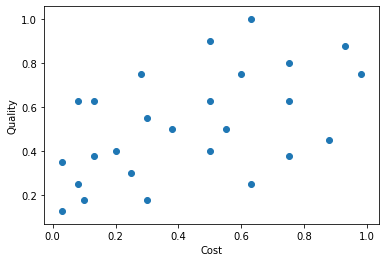

In [9]:
%matplotlib inline
plt.scatter(x['cost'],x['quality'])
plt.xlabel("Cost")
plt.ylabel("Quality")
plt.show()

#### This plot shows that their is positive relation between 'cost' and 'quality'.

### Applying the K-means Clustering

In [10]:
model=KMeans(max_iter=10,n_clusters=4,n_init=10,random_state=123)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [11]:
model.cluster_centers_

array([[0.33571429, 0.65142857, 0.85714286, 1.        , 1.        ,
        1.        , 3.71428571, 0.9       ],
       [0.589     , 0.432     , 0.2       , 0.7       , 0.3       ,
        0.2       , 1.6       , 0.5       ],
       [0.6325    , 0.79      , 0.75      , 0.25      , 0.25      ,
        1.        , 3.        , 0.65      ],
       [0.094     , 0.302     , 0.8       , 0.6       , 0.6       ,
        0.        , 3.2       , 0.32      ]])

### Deciding the optimal value of k using Elbow method and Silhouette method

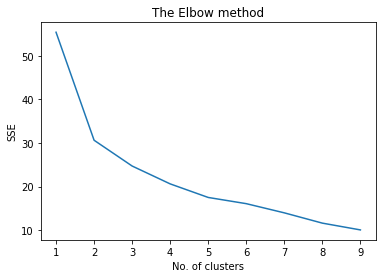

In [12]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show()

#### As seen from the above Elbow plot, value of k can be between 3 to 6.
#### So to decide it's optimal value, plotting Silhouette plot

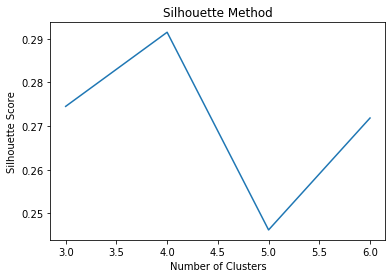

In [13]:
from sklearn.metrics import silhouette_score

sil=[]
kmax=6

for k in range(3, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_
  sil.append(silhouette_score(x, labels))

plt.plot(range(3,kmax+1),sil)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### From the above plot we can conclude that, <u>Optimal Value of k = 4</u> as Silhouette score is highest for 4 clusters

### Applying the kmeans to dataset with k=4

In [14]:
kmeans4=KMeans(n_clusters=4,max_iter=300,n_init=10,random_state=0)
label=kmeans4.fit_predict(x)

### Predicted clusters 

In [15]:
print(label)

[0 0 3 0 0 2 0 3 3 3 3 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1]


### Adding the Predicted clusters column to dataset to check the cluster allocated to  each Vendor

In [16]:
x['y_kmeans']=label

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
x.head()

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
0,0.13,0.63,1,1,1,1,4,0.9,0
1,0.08,0.63,1,1,1,1,4,0.9,0
2,0.50,0.90,1,0,1,1,3,0.8,3
3,0.63,1.00,1,1,1,1,4,0.9,0
4,0.28,0.75,0,1,1,1,4,1.0,0


In [18]:
cluster0=x[x["y_kmeans"]==0]
cluster1=x[x["y_kmeans"]==1]
cluster2=x[x["y_kmeans"]==2]
cluster3=x[x["y_kmeans"]==3]

In [19]:
cluster0

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
0,0.13,0.63,1,1,1,1,4,0.9,0
1,0.08,0.63,1,1,1,1,4,0.9,0
3,0.63,1.00,1,1,1,1,4,0.9,0
4,0.28,0.75,0,1,1,1,4,1.0,0
6,0.30,0.55,1,1,1,1,4,0.9,0


In [20]:
cluster1

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
15,0.75,0.63,1,1,0,0,2,0.6,1
16,0.98,0.75,0,1,0,1,2,0.6,1
18,0.75,0.80,0,1,1,0,2,0.6,1
19,0.10,0.18,0,1,0,0,2,0.5,1
20,0.25,0.30,0,0,0,0,2,0.4,1
21,0.50,0.40,0,1,1,0,2,0.5,1
22,0.30,0.18,1,1,0,0,1,0.4,1
23,0.75,0.38,0,1,0,0,1,0.5,1
24,0.63,0.25,0,0,1,1,1,0.6,1
25,0.88,0.45,0,0,0,0,1,0.3,1


In [21]:
cluster2

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
5,0.03,0.35,1,0,1,0,3,0.3,2
11,0.03,0.13,1,1,0,0,4,0.5,2
12,0.08,0.25,1,1,1,0,3,0.3,2
13,0.13,0.38,0,1,0,0,3,0.3,2
14,0.20,0.40,1,0,1,0,3,0.2,2


In [22]:
cluster3

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
2,0.50,0.90,1,0,1,1,3,0.8,3
7,0.50,0.63,1,1,0,1,3,0.5,3
8,0.60,0.75,1,0,0,1,3,0.6,3
9,0.38,0.50,1,1,1,1,3,0.8,3
10,0.55,0.50,1,1,1,1,3,0.9,3
17,0.93,0.88,0,0,0,1,3,0.7,3


### Visualizing the clusters

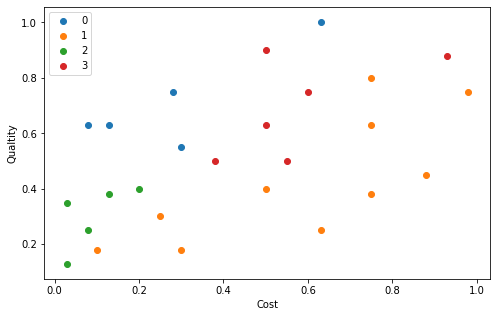

In [23]:
plt.figure(figsize=(8,5))
for i in range(0,4):
    plt.scatter(x[label==i]['cost'],x[label==i]['quality'],label=i)
    plt.xlabel("Cost")
    plt.ylabel("Qualtity")
plt.legend()
plt.show()

### As, the vendor who offers good quality at less cost is to be selected, cluster 1 and 2 does not satisfy that condition. So, cluster 1 and cluster 2 vendors cannot be selected
### So, plotting the scatter plot for clusters 0 and 3 as it satisfies condition of offering good quality at less cost and also has warranty_claims and other attributes that are good too

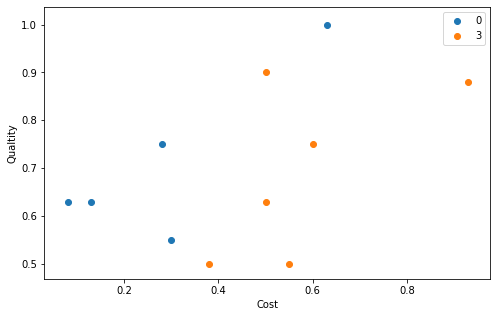

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(x[label==0]['cost'],x[label==0]['quality'],label=0)
plt.scatter(x[label==3]['cost'],x[label==3]['quality'],label=3)
plt.xlabel("Cost")
plt.ylabel("Qualtity")
plt.legend()
plt.show()

In [25]:
cluster0.describe()

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
count,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.000000,5.0
mean,0.284000,0.712000,0.800000,1.0,1.0,1.0,4.0,0.920000,0.0
std,0.215244,0.176125,0.447214,0.0,0.0,0.0,0.0,0.044721,0.0
min,0.080000,0.550000,0.000000,1.0,1.0,1.0,4.0,0.900000,0.0
25%,0.130000,0.630000,1.000000,1.0,1.0,1.0,4.0,0.900000,0.0
50%,0.280000,0.630000,1.000000,1.0,1.0,1.0,4.0,0.900000,0.0
75%,0.300000,0.750000,1.000000,1.0,1.0,1.0,4.0,0.900000,0.0
max,0.630000,1.000000,1.000000,1.0,1.0,1.0,4.0,1.000000,0.0


In [26]:
cluster3.describe()

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.000000,6.0
mean,0.576667,0.693333,0.833333,0.500000,0.500000,1.0,3.0,0.716667,3.0
std,0.187901,0.178624,0.408248,0.547723,0.547723,0.0,0.0,0.147196,0.0
min,0.380000,0.500000,0.000000,0.000000,0.000000,1.0,3.0,0.500000,3.0
25%,0.500000,0.532500,1.000000,0.000000,0.000000,1.0,3.0,0.625000,3.0
50%,0.525000,0.690000,1.000000,0.500000,0.500000,1.0,3.0,0.750000,3.0
75%,0.587500,0.847500,1.000000,1.000000,1.000000,1.0,3.0,0.800000,3.0
max,0.930000,0.900000,1.000000,1.000000,1.000000,1.0,3.0,0.900000,3.0


### Considering all the aspects, cluster 0 has the vendors who offer more quality at less price as well as also have  warranty_claims, existing relations with the organization, good number of professional employees.

In [27]:
cluster0

,cost,quality,iso,delivery_charges,existing_relationships,warranties_claims,professional_employees,avg_availability_components,y_kmeans
0,0.13,0.63,1,1,1,1,4,0.9,0
1,0.08,0.63,1,1,1,1,4,0.9,0
3,0.63,1.00,1,1,1,1,4,0.9,0
4,0.28,0.75,0,1,1,1,4,1.0,0
6,0.30,0.55,1,1,1,1,4,0.9,0


### Conclusion-
From cluster 0, based on several factors we have 3 vendors that are perfect for the organization they are-
<ol>
<li> <u>1st Preference </u>: At <b>Index 1</b> - Good quality at very less cost as well as also have warranty_claims, existing relations with the organizations, good number of professional employees</li>
<li><u>2nd Preference </u>: At <b>Index 0</b> - Good quality at that specified cost with all other parameters good </li>
<li><u>3rd Preference </u>: At <b>Index 3</b> - Best quality but cost is high as compared to index 1 and index 0 with all other parameters good</li>
</ol>

<h6>Note - Above procurements are based on the assumption that the components are not used in life saving purpose / are not life saving components. As if that was the case the quality would be of top most priority followed by cost and in such case 1st preference would be vendor with Index3.</h6>